In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function for Vandermonde matrix:

def vandermonde(x, n, order):
    v = np.zeros((n, order+1))

    for i in range(n):
       row = []
       for j in range(order+1):
          row.append(x[i])
       v[i] = row

    exp = []
    for i in range(order, -1, -1):
       exp.append(i)
    return v ** exp




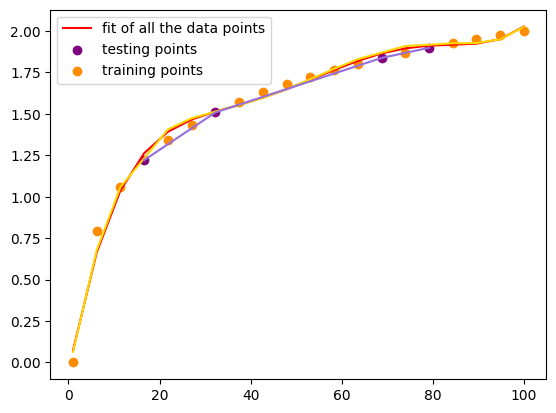

In [5]:
x = np.linspace(1,100,20)
y = np.log10(x)
n = len(x)
order = 5


v0 = vandermonde(x, len(x), order)

v_new0 = np.transpose(v0) @ v0

y_matrix0 = np.transpose(v0) @ y

coef_matrix0 = np.linalg.solve(v_new0, y_matrix0)

p0 = 0
for i in range(order+1):
    p0 += coef_matrix0[len(coef_matrix0) - (i+1)]* x**i

plt.plot(x, p0, color = "r", label = "fit of all the data points")



x_training = np.random.choice(x, int(0.8 * n), replace = False)
  
x_training = np.sort(x_training)
y_training = np.log10(x_training)

v = vandermonde(x_training, len(x_training), order)

v_new = np.transpose(v) @ v

y_matrix = np.transpose(v) @ y_training

coef_matrix = np.linalg.solve(v_new, y_matrix)

p = 0
for i in range(order+1):
    p += coef_matrix[len(coef_matrix) - (i+1)]* x_training**i


x_testing =np.zeros(int(0.2*n))
a = 0
for i in range(n):
    if x[i] not in x_training:
       x_testing[a] = x[i]
       a += 1
y_testing = np.log10(x_testing)

v1 = vandermonde(x_testing, len(x_testing), order)

v_new1 = np.transpose(v1) @ v1

y_matrix1 = np.transpose(v1) @ y_testing

coef_matrix1 = np.linalg.solve(v_new1, y_matrix1)

p1 = 0
for i in range(order+1):
    p1 += coef_matrix1[len(coef_matrix1) - (i+1)]* x_testing**i


plt.scatter(x_testing, y_testing, color = "purple", label = "testing points")
plt.scatter(x_training, y_training, color = "darkorange", label = "training points")

plt.plot(x_training, p, color = "gold")
plt.plot(x_testing, p1, color = "mediumpurple")
plt.legend()
plt.show()



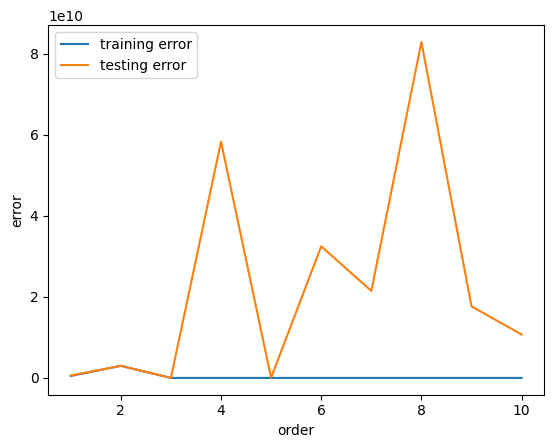

In [11]:
x = np.linspace(-50,50,20)
y = x**3 + np.random.randint(-15,15)
n = len(x)
order = [1,2,3,4,5,6,7,8,9,10]
test_error = []
train_error = []

# USING ALL MY DATA POINTS:

# v0 = vandermonde(x, len(x), order+1)
# v_new0 = np.transpose(v0) @ v0
# y_matrix0 = np.transpose(v0) @ y
# coef_matrix0 = np.linalg.solve(v_new0, y_matrix0)
# p0 = 0
# for i in range(order+1):
#     p0 += coef_matrix0[len(coef_matrix0) - (i+1)]* x**i
# plt.plot(x, p0, color = "r", label = "fit of all the data points")


# USING THE TRAINING DATA POINTS:

for o in order:

   x_training = np.random.choice(x, int(0.8 * n), replace = False)
   x_training = np.sort(x_training)
   y_training = x_training**3
   v = vandermonde(x_training, len(x_training), o+1)
   v_new = np.transpose(v) @ v
   y_matrix = np.transpose(v) @ y_training
   coef_matrix = np.linalg.solve(v_new, y_matrix)
   p = 0
   for i in range(o+1):
       p += coef_matrix[len(coef_matrix) - (i+1)]* x**i
#    plt.scatter(x_training, y_training, color = "darkorange", label = "training points")
#    plt.plot(x, p, color = "gold")
   train_error.append((1/len(y)) *np.sum((p - y)**2))


# USING THE TESTING DATA POINTS:

   x_testing =np.zeros(int(0.2*n))
   a = 0
   for i in range(n):
       if x[i] not in x_training:
          x_testing[a] = x[i]
          a += 1
   x_testing = np.sort(x_testing)
   y_testing = x_testing**3
   v1 = vandermonde(x_testing, len(x_testing), o+1)
   v_new1 = np.transpose(v1) @ v1
   y_matrix1 = np.transpose(v1) @ y_testing
   coef_matrix1 = np.linalg.solve(v_new1, y_matrix1)
   p1 = 0
   for i in range(o+1):
       p1 += coef_matrix1[len(coef_matrix1) - (i+1)]* x**i
#    plt.scatter(x_testing, y_testing, color = "purple", label = "testing points")
#    plt.plot(x, p1, color = "m")
   test_error.append((1/len(y)) * np.sum((p1 - y)**2))
   
 
  
plt.plot(order, train_error, label = "training error")
plt.plot(order, test_error, label = "testing error")
plt.xlabel("order")
plt.ylabel("error")
plt.legend()
plt.show()



15.00000000003395


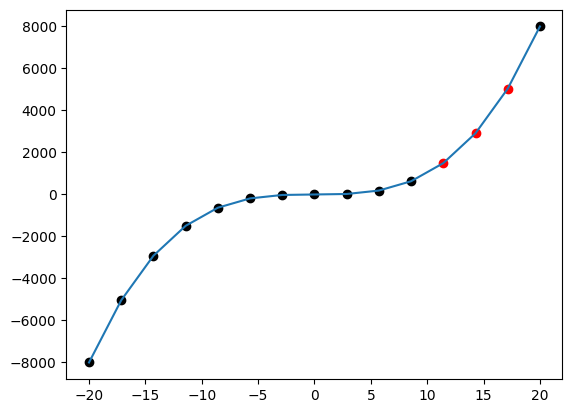

In [27]:
x = np.linspace(-20,20,15)
y = x**3 + np.random.randint(-2,2)
n = len(x)

x_train = np.random.choice(x, int(0.8*n), replace = False)
x_train = np.sort(x_train)
y_train = x_train**3
x_test= np.empty(int(0.2*n))
a = 0
for i in x:
    if i not in x_train:
       x_test[a] = i
       a+=1
y_test = x_test**3

order = 4
v = vandermonde(x_train, int(0.8*n), order)
v_new = np.transpose(v) @ v
y_new = np.transpose(v) @ y_train
coef = np.linalg.solve(v_new, y_new)
p = 0

for i in range(order+1):
    p += coef[len(coef) - (i+1)]* x**i




train_error = (1/len(y)) * np.sum((p-y)**2)
plt.plot(x, p)


print(train_error)


plt.scatter(x_test, y_test, color = "r")
plt.scatter(x_train, y_train, color = "k")

plt.show()